<a href="https://colab.research.google.com/github/alirezarahimi1393/Classical-Learning/blob/master/First_homework_CNN_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install torch torchvision -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 975.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [1]:
import torch, random
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn as nn
from torchvision.models import inception_v3
import torch.optim as optim


In [2]:
# Define the transformations to apply to the images

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((299, 299)),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])


In [3]:
#Downlaoding the CIFAR - 10 training dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

#Downloading the CIFAR-10 test dataset
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

model = inception_v3(pretrained=True)

num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)



100%|██████████| 170498071/170498071 [00:02<00:00, 81235841.93it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:01<00:00, 102MB/s] 


In [4]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [6]:
#Training the Dataset
device = torch.device('cuda:0' if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(5):
  running_loss =0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data[0].to(device), data[1].to(device)
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs[0], labels)
    loss.backward()
    optimizer.step()
    running_loss +=loss.item()
    if i % 100 ==99:
     print('[%d, %5d] loss: %.3f' %
           (epoch + 1, i + 1, running_loss / 100))
     running_loss = 0.0
print('Finished Training')

# for epoch in range(5):
#     running_loss = 0.0
#     for i, data in enumerate(trainloader, 0):
#         inputs, labels = data[0].to(device), data[1].to(device)
#         optimizer.zero_grad()
#         outputs = model(inputs)
#         loss = criterion(outputs[0], labels)
#         loss.backward()
#         optimizer.step()
#         running_loss += loss.item()
#         if i % 100 == 99:
#             print('[%d, %5d] loss: %.3f' %
#                   (epoch + 1, i + 1, running_loss / 100))
#             running_loss = 0.0

# print('Finished Training')


[1,   100] loss: 0.068
[1,   200] loss: 0.065
[1,   300] loss: 0.070
[1,   400] loss: 0.064
[1,   500] loss: 0.086
[1,   600] loss: 0.091
[1,   700] loss: 0.067
[1,   800] loss: 0.073
[1,   900] loss: 0.094
[1,  1000] loss: 0.065
[1,  1100] loss: 0.074
[1,  1200] loss: 0.081
[1,  1300] loss: 0.067
[1,  1400] loss: 0.066
[1,  1500] loss: 0.078
[2,   100] loss: 0.048
[2,   200] loss: 0.043
[2,   300] loss: 0.039
[2,   400] loss: 0.044
[2,   500] loss: 0.044
[2,   600] loss: 0.039
[2,   700] loss: 0.049
[2,   800] loss: 0.048
[2,   900] loss: 0.044
[2,  1000] loss: 0.052
[2,  1100] loss: 0.038
[2,  1200] loss: 0.041
[2,  1300] loss: 0.047
[2,  1400] loss: 0.054
[2,  1500] loss: 0.048
[3,   100] loss: 0.030
[3,   200] loss: 0.033
[3,   300] loss: 0.027
[3,   400] loss: 0.021
[3,   500] loss: 0.024
[3,   600] loss: 0.023
[3,   700] loss: 0.028
[3,   800] loss: 0.035
[3,   900] loss: 0.019
[3,  1000] loss: 0.028
[3,  1100] loss: 0.027
[3,  1200] loss: 0.025
[3,  1300] loss: 0.028
[3,  1400] 

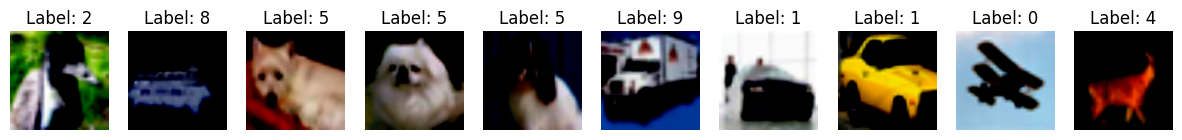

In [17]:
# # Visualize a few samples from the dataset
# num_samples = 10  # Number of samples to visualize
# fig, axs = plt.subplots(1, num_samples, figsize=(15, 3))

# for i in range(num_samples):
#     sample, label = train_dataset[i]  # Get a sample and label from the dataset
#     image = sample.permute(1, 2, 0) if sample.dim() == 3 else sample  # Permute dimensions for image visualization
#     axs[i].imshow(image)
#     axs[i].axis('off')
#     axs[i].set_title(f"Label: {label}")

# plt.show()


num_samples = 10
fig, axs = plt.subplots(1, num_samples, figsize=(15, 3))
i = random.randint(1, 100)
for i in range(num_samples):
  random_index = random.randint(0, len(train_dataset) - 1)  # Generate a random index
  sample, label = train_dataset[random_index]  # Select a random sample from the dataset
  image = sample.permute(1, 2, 0) if sample.dim() == 3 else sample
  axs[i].imshow(image)
  axs[i].axis('off')
  axs[i].set_title(f"Label: {label}")
plt.show()


In [7]:
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
total_loss = 0

with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = correct / total
test_loss = total_loss / len(testloader)
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')

Test Accuracy: 0.9676
Test Loss: 0.1270645213216326


In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

model.eval()  # Set the model to evaluation mode
predictions = []
targets = []

with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        predictions.extend(predicted.cpu().numpy())
        targets.extend(labels.cpu().numpy())

# Convert predictions and targets to numpy arrays
predictions = np.array(predictions)
targets = np.array(targets)

# Print Classification Report
print('Classification Report:')
print(classification_report(targets, predictions))

# Print Confusion Matrix
print('Confusion Matrix:')
print(confusion_matrix(targets, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1000
           1       0.98      0.98      0.98      1000
           2       0.97      0.96      0.97      1000
           3       0.91      0.93      0.92      1000
           4       0.98      0.96      0.97      1000
           5       0.95      0.94      0.95      1000
           6       0.99      0.98      0.98      1000
           7       0.98      0.98      0.98      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.97      0.98      1000

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Confusion Matrix:
[[972   0   7   4   0   0   0   1  13   3]
 [  2 985   0   0   0   0   0   0   3  10]
 [  7   0 964  12   4   5   1   6   1   0]
 [  0   1   6 932   4  39   8   7   2   1]
 [  2   1  11  13 958   4   

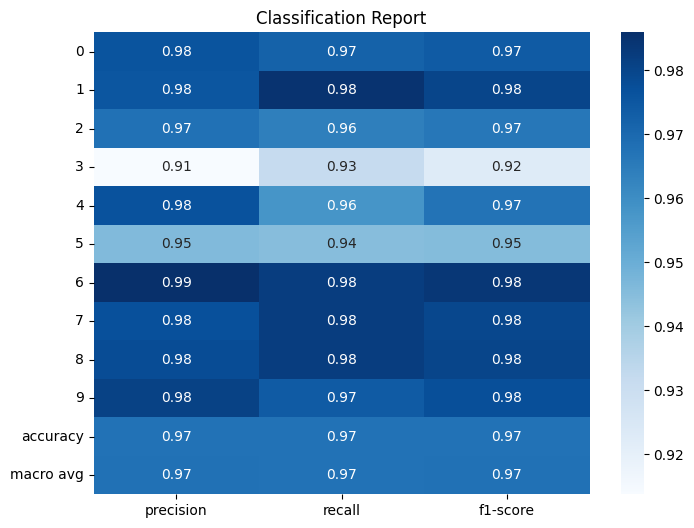

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Generate the Classification Report
report = classification_report(targets, predictions, output_dict=True)
df = pd.DataFrame(report).transpose()

# Plot the Classification Report using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.iloc[:-1, :3], annot=True, cmap='Blues', fmt='.2f')
plt.title('Classification Report')
plt.show()

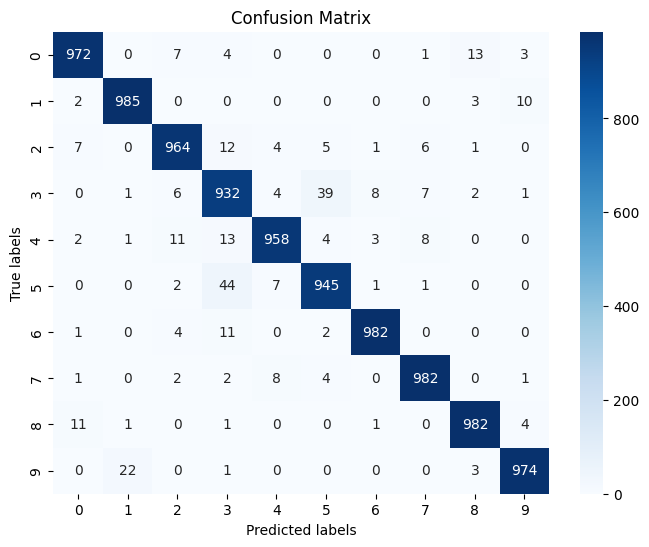

In [10]:
from sklearn.metrics import confusion_matrix

# Generate the Confusion Matrix
cm = confusion_matrix(targets, predictions)

# Plot the Confusion Matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()